In [1]:
import pandas as pd
from IPython.display import Image

pd.options.mode.chained_assignment = None  # default='warn'

%store -r recordings
%store -r filenames
%store -r arl

In [2]:
arl['Location name'].unique()

array(['E100 edge', 'D100 641', 'C10 621', 'B10', 'E1 648', 'D Matrix',
       'C Matrix', 'Riparian 2', 'VJR 1', 'VJR 2', 'B1 602'], dtype=object)

In [4]:
# defining a dict of disturbance categories 

# the aim is to compare similarly different recordings / sites or at least site types
# creating groups based on closeness of the location
# group_selectively_logged_1 = ['B10', 'B1 602', 'C10 621' ]
# group_selectively_logged_2 = ['E100 edge', 'E1 648', 'D100 641' ]

disturbance = {
    'VJR 1':'old_growth_forest', 
    'VJR 2':'old_growth_forest', 
    'Riparian 1':'old_growth_forest', 
    'Riparian 2':'old_growth_forest',
    'OP Belian':'oil_palm',
    'OP3 843':'oil_palm',
    'C Matrix':'salvage_logged_forest',
    'D Matrix':'salvage_logged_forest',
    'B10':'selectively_logged_A', 
    'B1 602':'selectively_logged_A', 
    'C10 621':'selectively_logged_A',
    'LFE river':'selectively_logged_A',
}

recordings['Site_type'] = recordings['Site'].map(disturbance)
recordings['Site_type'] = recordings['Site_type'].fillna('selectively_logged_B')
recordings.sort_values(by = 'Site_type')

3,field_name,Point_count_ID,Audio_file,Site,Date,Time,Weather,Adi_Syamin,Jani,Notes,Site_type
1395,1392,19_11_27_02,PC0001_1178,VJR 2,11/27/2019,07:00:00 AM,sun,0,1,NaN,old_growth_forest
386,383,18_06_30_4,PC0001_0093,VJR 1,6/30/2018,08:00:00 AM,clouded,1,1,NaN,old_growth_forest
384,381,18_06_30_2,PC0001_0091,VJR 1,6/30/2018,06:00:00 AM,dusk,1,1,NaN,old_growth_forest
1426,1423,19_12_09_04,PC0001_1204,VJR 1,12/9/2019,09:00:00 PM,dark,0,1,NaN,old_growth_forest
289,286,18_06_05_5,PC0001_0005,Riparian 2,6/5/2018,08:00:00 AM,clouded,1,1,NaN,old_growth_forest
174,171,18_04_26_4,PC0000_0176,D Matrix,4/26/2018,06:00:00 AM,dawn,0,1,NaN,salvage_logged_forest
175,172,18_04_26_5,PC0000_0177,D Matrix,4/26/2018,07:00:00 AM,clouded,0,1,NaN,salvage_logged_forest
278,275,18_06_02_6,PC0000_0276,C Matrix,6/2/2018,08:00:00 AM,after rain,1,1,NaN,salvage_logged_forest
1045,1042,19_09_07_03,PC0001_0828,C10 621,9/7/2019,08:00:00 AM,sun,0,1,NaN,selectively_logged_A
366,363,18_06_26_2,PC0001_0073,B10,6/26/2018,10:00:00 AM,clouded,1,1,NaN,selectively_logged_A


In [5]:
dates = recordings['Date'].str.split('/', expand = True)
dates.columns = ['month', 'day', 'year']

ampm = recordings['Time'].str.split(' ', expand = True)
ampm.columns = ['time', 'am/pm']

df = pd.concat([recordings, dates, ampm], axis = 1)
df = df.loc[ampm['am/pm'] == 'AM'] # excluding PM recordings are they are more rare

df = df[['field_name', 'Point_count_ID', 'Audio_file', 'Site',
       'Weather', 'Site_type', 'year', 'month', 'day', 'time', 'am/pm']] # narrowing down to what seems important going forward

cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

count = df['date'].value_counts().to_frame().reset_index()
count.columns = ['date', 'count']

df = pd.merge(df, count, on = 'date')
df.sort_values(by = 'Site_type')

,field_name,Point_count_ID,Audio_file,Site,Weather,Site_type,year,month,day,time,am/pm,date,count
14,383,18_06_30_4,PC0001_0093,VJR 1,clouded,old_growth_forest,2018,6,30,08:00:00,AM,2018-6-30,2
13,381,18_06_30_2,PC0001_0091,VJR 1,dusk,old_growth_forest,2018,6,30,06:00:00,AM,2018-6-30,2
16,1392,19_11_27_02,PC0001_1178,VJR 2,sun,old_growth_forest,2019,11,27,07:00:00,AM,2019-11-27,1
9,286,18_06_05_5,PC0001_0005,Riparian 2,clouded,old_growth_forest,2018,6,5,08:00:00,AM,2018-6-5,1
0,171,18_04_26_4,PC0000_0176,D Matrix,dawn,salvage_logged_forest,2018,4,26,06:00:00,AM,2018-4-26,2
1,172,18_04_26_5,PC0000_0177,D Matrix,clouded,salvage_logged_forest,2018,4,26,07:00:00,AM,2018-4-26,2
7,275,18_06_02_6,PC0000_0276,C Matrix,after rain,salvage_logged_forest,2018,6,2,08:00:00,AM,2018-6-2,1
15,1042,19_09_07_03,PC0001_0828,C10 621,sun,selectively_logged_A,2019,9,7,08:00:00,AM,2019-9-7,1
12,363,18_06_26_2,PC0001_0073,B10,clouded,selectively_logged_A,2018,6,26,10:00:00,AM,2018-6-26,1
10,291,18_06_07_JA_4,PC0001_0010,C10 621,clouded,selectively_logged_A,2018,6,7,06:00:00,AM,2018-6-7,2


In [6]:
print('looking at', len(df), 'available audio files only')
files_available = df['Audio_file'].to_list()
%store files_available

looking at 18 available audio files only
Stored 'files_available' (list)


In [8]:
print('Available recordings/sites:')
df['Site'].value_counts()

Available recordings/sites:


B10           3
E1 648        2
D100 641      2
C10 621       2
D Matrix      2
VJR 1         2
VJR 2         1
E100 edge     1
C Matrix      1
Riparian 2    1
B1 602        1
Name: Site, dtype: int64

### deciding how to decide..

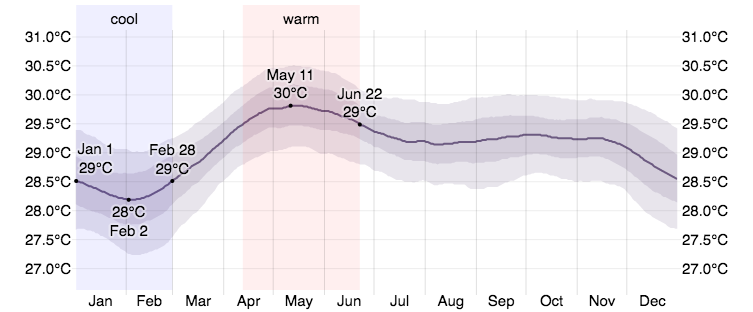

© WeatherSpark.com


In [6]:
display(Image(filename='../data/temp_tawau.png')) # sunset and sunrise varies very little over time and the climate is rather even too
print('© WeatherSpark.com')

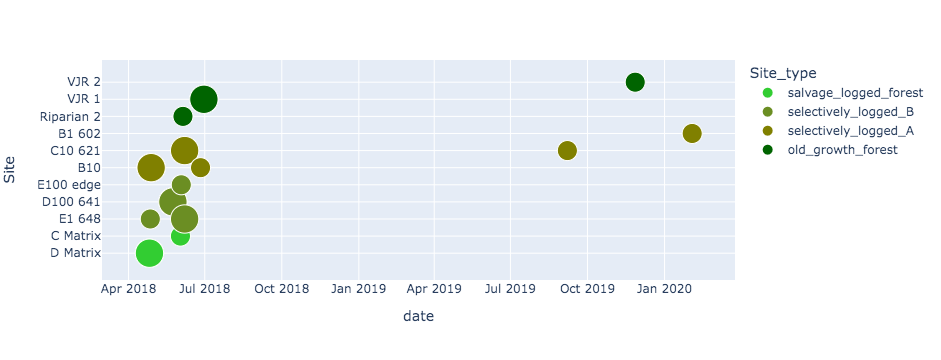

In [22]:
import plotly.express as px

color_discrete_map = {'old_growth_forest': 'DarkGreen', 
                      'selectively_logged_A': 'Olive',
                      'selectively_logged_B': 'OliveDrab', 
                      'salvage_logged_forest': 'LimeGreen',
                     }
px.scatter(df, y="Site", x="date", size = 'count', color="Site_type", color_discrete_map = color_discrete_map, opacity = 1)

#### conclusion
- locations that have more than 1 recording on the same day (and same conditions) could be tested as control
- an avarage of acoustic complexity could be calculated for the 4 different groups / 3 different landuses from the recordings of 2018
- old_growth_forest and selectively_logged_A group could be comparead over time
- salvage_logged_forest can be compared to selevtively logged forests (similar recording dates and times)

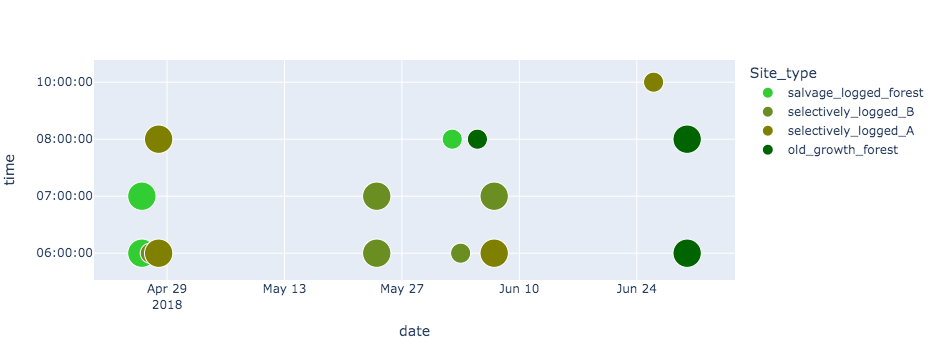

In [15]:
df18 = df.loc[df['year'] == '2018']

# px.scatter(df18, y="time", x="date", size = 'count', color="Site", color_discrete_map = color_discrete_map, opacity = 1)
px.scatter(df18, y="time", x="date", size = 'count', color="Site_type", color_discrete_map = color_discrete_map, opacity = 1)

- to compare the most recordings at once, we can take the 6 AM recordings across sites

In [12]:
df6am = df18.loc[df18['time'] == '06:00:00']
df6am

,field_name,Point_count_ID,Audio_file,Site,Weather,Site_type,year,month,day,time,am/pm,date,count
0,171,18_04_26_4,PC0000_0176,D Matrix,dawn,salvage_logged_forest,2018,4,26,06:00:00,AM,2018-4-26,2
2,176,18_04_27_3,PC0000_0181,E1 648,dawn,selectively_logged_B,2018,4,27,06:00:00,AM,2018-4-27,1
3,182,18_04_28_4,PC0000_0187,B10,dawn,selectively_logged_A,2018,4,28,06:00:00,AM,2018-4-28,2
5,248,18_05_24_4,PC0000_0249,D100 641,dusk,selectively_logged_B,2018,5,24,06:00:00,AM,2018-5-24,2
8,278,18_06_03_3,PC0000_0279,E100 edge,after rain,selectively_logged_B,2018,6,3,06:00:00,AM,2018-6-3,1
10,291,18_06_07_JA_4,PC0001_0010,C10 621,clouded,selectively_logged_A,2018,6,7,06:00:00,AM,2018-6-7,2
13,381,18_06_30_2,PC0001_0091,VJR 1,dusk,old_growth_forest,2018,6,30,06:00:00,AM,2018-6-30,2


In [16]:
%store df
%store df6am
%store color_discrete_map

Stored 'df' (DataFrame)
Stored 'df6am' (DataFrame)
Stored 'color_discrete_map' (dict)
